In [1]:
#Task 1.0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import  GridSearchCV

warnings.filterwarnings('ignore')


In [2]:
#Task 1.1
#In prior EDA submission, I used Late_Payment column to spit the data evenly into 80/20

ModelCCLoan=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\Train_Output.csv',header=0)


In [3]:
#Task 1.2
ModelCCLoan.head()

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1,Permutation2,Permutation3
0,278063,1,Revolving loans,F,Y,Y,2,11.502885,12.660331,9.664659,12.660331,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,-1508.0,-2031,3.0,1,1,1,1,1,0,Sales staff,4.0,3,3,FRIDAY,10,0,0,0,0,0,0,Trade: type 7,block of flats,Panel,1.0,0.0,1.0,0.0,-1466.0,1.0,2.0,0,0,0
1,218501,0,Cash loans,M,Y,Y,0,11.877576,13.937287,10.409009,13.937287,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.025164,-644.0,-4172,5.0,1,1,1,1,1,0,Drivers,1.0,2,2,THURSDAY,11,0,0,0,0,0,0,Business Entity Type 3,block of flats,Block,1.0,0.0,1.0,0.0,-1868.0,0.0,0.0,0,0,0
2,159366,0,Cash loans,F,N,Y,0,12.218500,12.558140,9.708537,12.323860,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,0.019101,-13269.0,-4642,0.0,1,1,0,1,0,0,Sales staff,1.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Self-employed,unknown,unknown,0.0,0.0,0.0,0.0,-2690.0,0.0,9.0,0,0,0
3,375362,0,Revolving loans,F,N,Y,0,12.506181,13.199326,10.203629,13.199326,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.010556,-288.0,-2281,0.0,1,1,0,1,0,1,unknown,2.0,3,3,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,block of flats,Panel,1.0,0.0,1.0,0.0,-2308.0,2.0,8.0,1,0,0
4,119706,1,Cash loans,F,N,Y,0,11.967187,13.498689,10.569764,13.422469,Unaccompanied,Pensioner,Higher education,Separated,House / apartment,0.019101,-6712.0,-3615,0.0,1,0,0,1,0,0,unknown,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,XNA,unknown,unknown,2.0,0.0,2.0,0.0,-2495.0,0.0,1.0,0,1,0


In [4]:
#Task 1.3.0
ModelCCLoan.shape

(230633, 51)

In [5]:
#Task 1.3.1
#got an error doing linear regression model
#dropping columns that are not float or numberic value 
ModelCCLoan.drop(ModelCCLoan[['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', \
                              'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START', \
                              'ORGANIZATION_TYPE', 'HOUSETYPE_MODE','WALLSMATERIAL_MODE']].columns,axis=1,inplace=True)



In [6]:
#Task 1.3.1
ModelCCLoan.shape

(230633, 40)

In [7]:
#Task 1.3.2
ModelCCLoan.head(10)

,CLIENTID,LATE_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1,Permutation2,Permutation3
0,278063,1,F,Y,Y,2,11.502885,12.660331,9.664659,12.660331,0.020246,-1508.0,-2031,3.0,1,1,1,1,1,0,4.0,3,3,10,0,0,0,0,0,0,1.0,0.0,1.0,0.0,-1466.0,1.0,2.0,0,0,0
1,218501,0,M,Y,Y,0,11.877576,13.937287,10.409009,13.937287,0.025164,-644.0,-4172,5.0,1,1,1,1,1,0,1.0,2,2,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,-1868.0,0.0,0.0,0,0,0
2,159366,0,F,N,Y,0,12.218500,12.558140,9.708537,12.323860,0.019101,-13269.0,-4642,0.0,1,1,0,1,0,0,1.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-2690.0,0.0,9.0,0,0,0
3,375362,0,F,N,Y,0,12.506181,13.199326,10.203629,13.199326,0.010556,-288.0,-2281,0.0,1,1,0,1,0,1,2.0,3,3,17,0,0,0,0,0,0,1.0,0.0,1.0,0.0,-2308.0,2.0,8.0,1,0,0
4,119706,1,F,N,Y,0,11.967187,13.498689,10.569764,13.422469,0.019101,-6712.0,-3615,0.0,1,0,0,1,0,0,1.0,2,2,15,0,0,0,0,0,0,2.0,0.0,2.0,0.0,-2495.0,0.0,1.0,0,1,0
5,313946,0,F,N,N,0,11.995358,12.762333,9.494052,12.570719,0.022625,-10291.0,-4111,0.0,1,0,0,1,0,0,1.0,2,2,12,0,0,0,0,0,0,11.0,0.0,11.0,0.0,-1605.0,0.0,4.0,0,1,1
6,249061,0,F,Y,Y,0,11.119898,13.207609,9.773635,13.026955,0.007020,-5841.0,-377,14.0,1,1,1,1,1,0,2.0,2,2,12,0,0,0,0,0,0,4.0,0.0,4.0,0.0,-1081.0,0.0,2.0,0,0,0
7,372451,0,M,N,N,0,11.813037,13.017005,10.210770,13.017005,0.018209,-3550.0,-1388,0.0,1,1,0,1,0,0,1.0,3,3,18,0,0,0,1,1,0,3.0,0.0,3.0,0.0,-1279.0,0.0,1.0,0,0,0
8,266187,0,M,Y,N,1,12.100718,11.547337,9.177404,11.547337,0.006207,-7761.0,-34,6.0,1,1,1,1,1,0,2.0,2,2,14,0,0,0,0,0,0,5.0,1.0,5.0,1.0,-1322.0,0.0,3.0,0,0,0
9,373366,0,M,Y,N,0,11.630717,12.323860,9.964324,12.323860,0.026392,-5284.0,-2270,3.0,1,1,0,1,0,0,1.0,2,2,17,0,0,0,0,1,1,0.0,0.0,0.0,0.0,-725.0,0.0,1.0,0,0,0


In [8]:
#Task 1.3.3
#need to remove columns that are not floats.  I need change all N to 0 and Y to 1
#also F to 0, M to 1
ModelCCLoan.replace({'FLAG_OWN_REALTY':{'Y':1},'CODE_GENDER':{'M':1},'FLAG_OWN_CAR':{'Y':1}},inplace=True)
ModelCCLoan.replace({'FLAG_OWN_REALTY':{'N':0},'CODE_GENDER':{'F':0},'FLAG_OWN_CAR':{'N':0}},inplace=True)


In [9]:
#Task 1.3.4
ModelCCLoan.head(10)

,CLIENTID,LATE_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1,Permutation2,Permutation3
0,278063,1,0,1,1,2,11.502885,12.660331,9.664659,12.660331,0.020246,-1508.0,-2031,3.0,1,1,1,1,1,0,4.0,3,3,10,0,0,0,0,0,0,1.0,0.0,1.0,0.0,-1466.0,1.0,2.0,0,0,0
1,218501,0,1,1,1,0,11.877576,13.937287,10.409009,13.937287,0.025164,-644.0,-4172,5.0,1,1,1,1,1,0,1.0,2,2,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,-1868.0,0.0,0.0,0,0,0
2,159366,0,0,0,1,0,12.218500,12.558140,9.708537,12.323860,0.019101,-13269.0,-4642,0.0,1,1,0,1,0,0,1.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-2690.0,0.0,9.0,0,0,0
3,375362,0,0,0,1,0,12.506181,13.199326,10.203629,13.199326,0.010556,-288.0,-2281,0.0,1,1,0,1,0,1,2.0,3,3,17,0,0,0,0,0,0,1.0,0.0,1.0,0.0,-2308.0,2.0,8.0,1,0,0
4,119706,1,0,0,1,0,11.967187,13.498689,10.569764,13.422469,0.019101,-6712.0,-3615,0.0,1,0,0,1,0,0,1.0,2,2,15,0,0,0,0,0,0,2.0,0.0,2.0,0.0,-2495.0,0.0,1.0,0,1,0
5,313946,0,0,0,0,0,11.995358,12.762333,9.494052,12.570719,0.022625,-10291.0,-4111,0.0,1,0,0,1,0,0,1.0,2,2,12,0,0,0,0,0,0,11.0,0.0,11.0,0.0,-1605.0,0.0,4.0,0,1,1
6,249061,0,0,1,1,0,11.119898,13.207609,9.773635,13.026955,0.007020,-5841.0,-377,14.0,1,1,1,1,1,0,2.0,2,2,12,0,0,0,0,0,0,4.0,0.0,4.0,0.0,-1081.0,0.0,2.0,0,0,0
7,372451,0,1,0,0,0,11.813037,13.017005,10.210770,13.017005,0.018209,-3550.0,-1388,0.0,1,1,0,1,0,0,1.0,3,3,18,0,0,0,1,1,0,3.0,0.0,3.0,0.0,-1279.0,0.0,1.0,0,0,0
8,266187,0,1,1,0,1,12.100718,11.547337,9.177404,11.547337,0.006207,-7761.0,-34,6.0,1,1,1,1,1,0,2.0,2,2,14,0,0,0,0,0,0,5.0,1.0,5.0,1.0,-1322.0,0.0,3.0,0,0,0
9,373366,0,1,1,0,0,11.630717,12.323860,9.964324,12.323860,0.026392,-5284.0,-2270,3.0,1,1,0,1,0,0,1.0,2,2,17,0,0,0,0,1,1,0.0,0.0,0.0,0.0,-725.0,0.0,1.0,0,0,0


In [10]:
#Task 1.4
y=ModelCCLoan[['CODE_GENDER']]

In [11]:
#Task 1.5
X=ModelCCLoan.drop(['CODE_GENDER'],axis=1)

In [12]:
#Task 1.6
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

Linear regression model

In [13]:
#Task 2.0
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [14]:
#Task 2.1
predictions = model.predict(X_test)

In [15]:
#Task 2.2
print("R^2 is: \n", model.score(X_test, y_test))
print('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.17648050072531563
RMSE is: 
 0.18587384816718988


Ridge Regression model

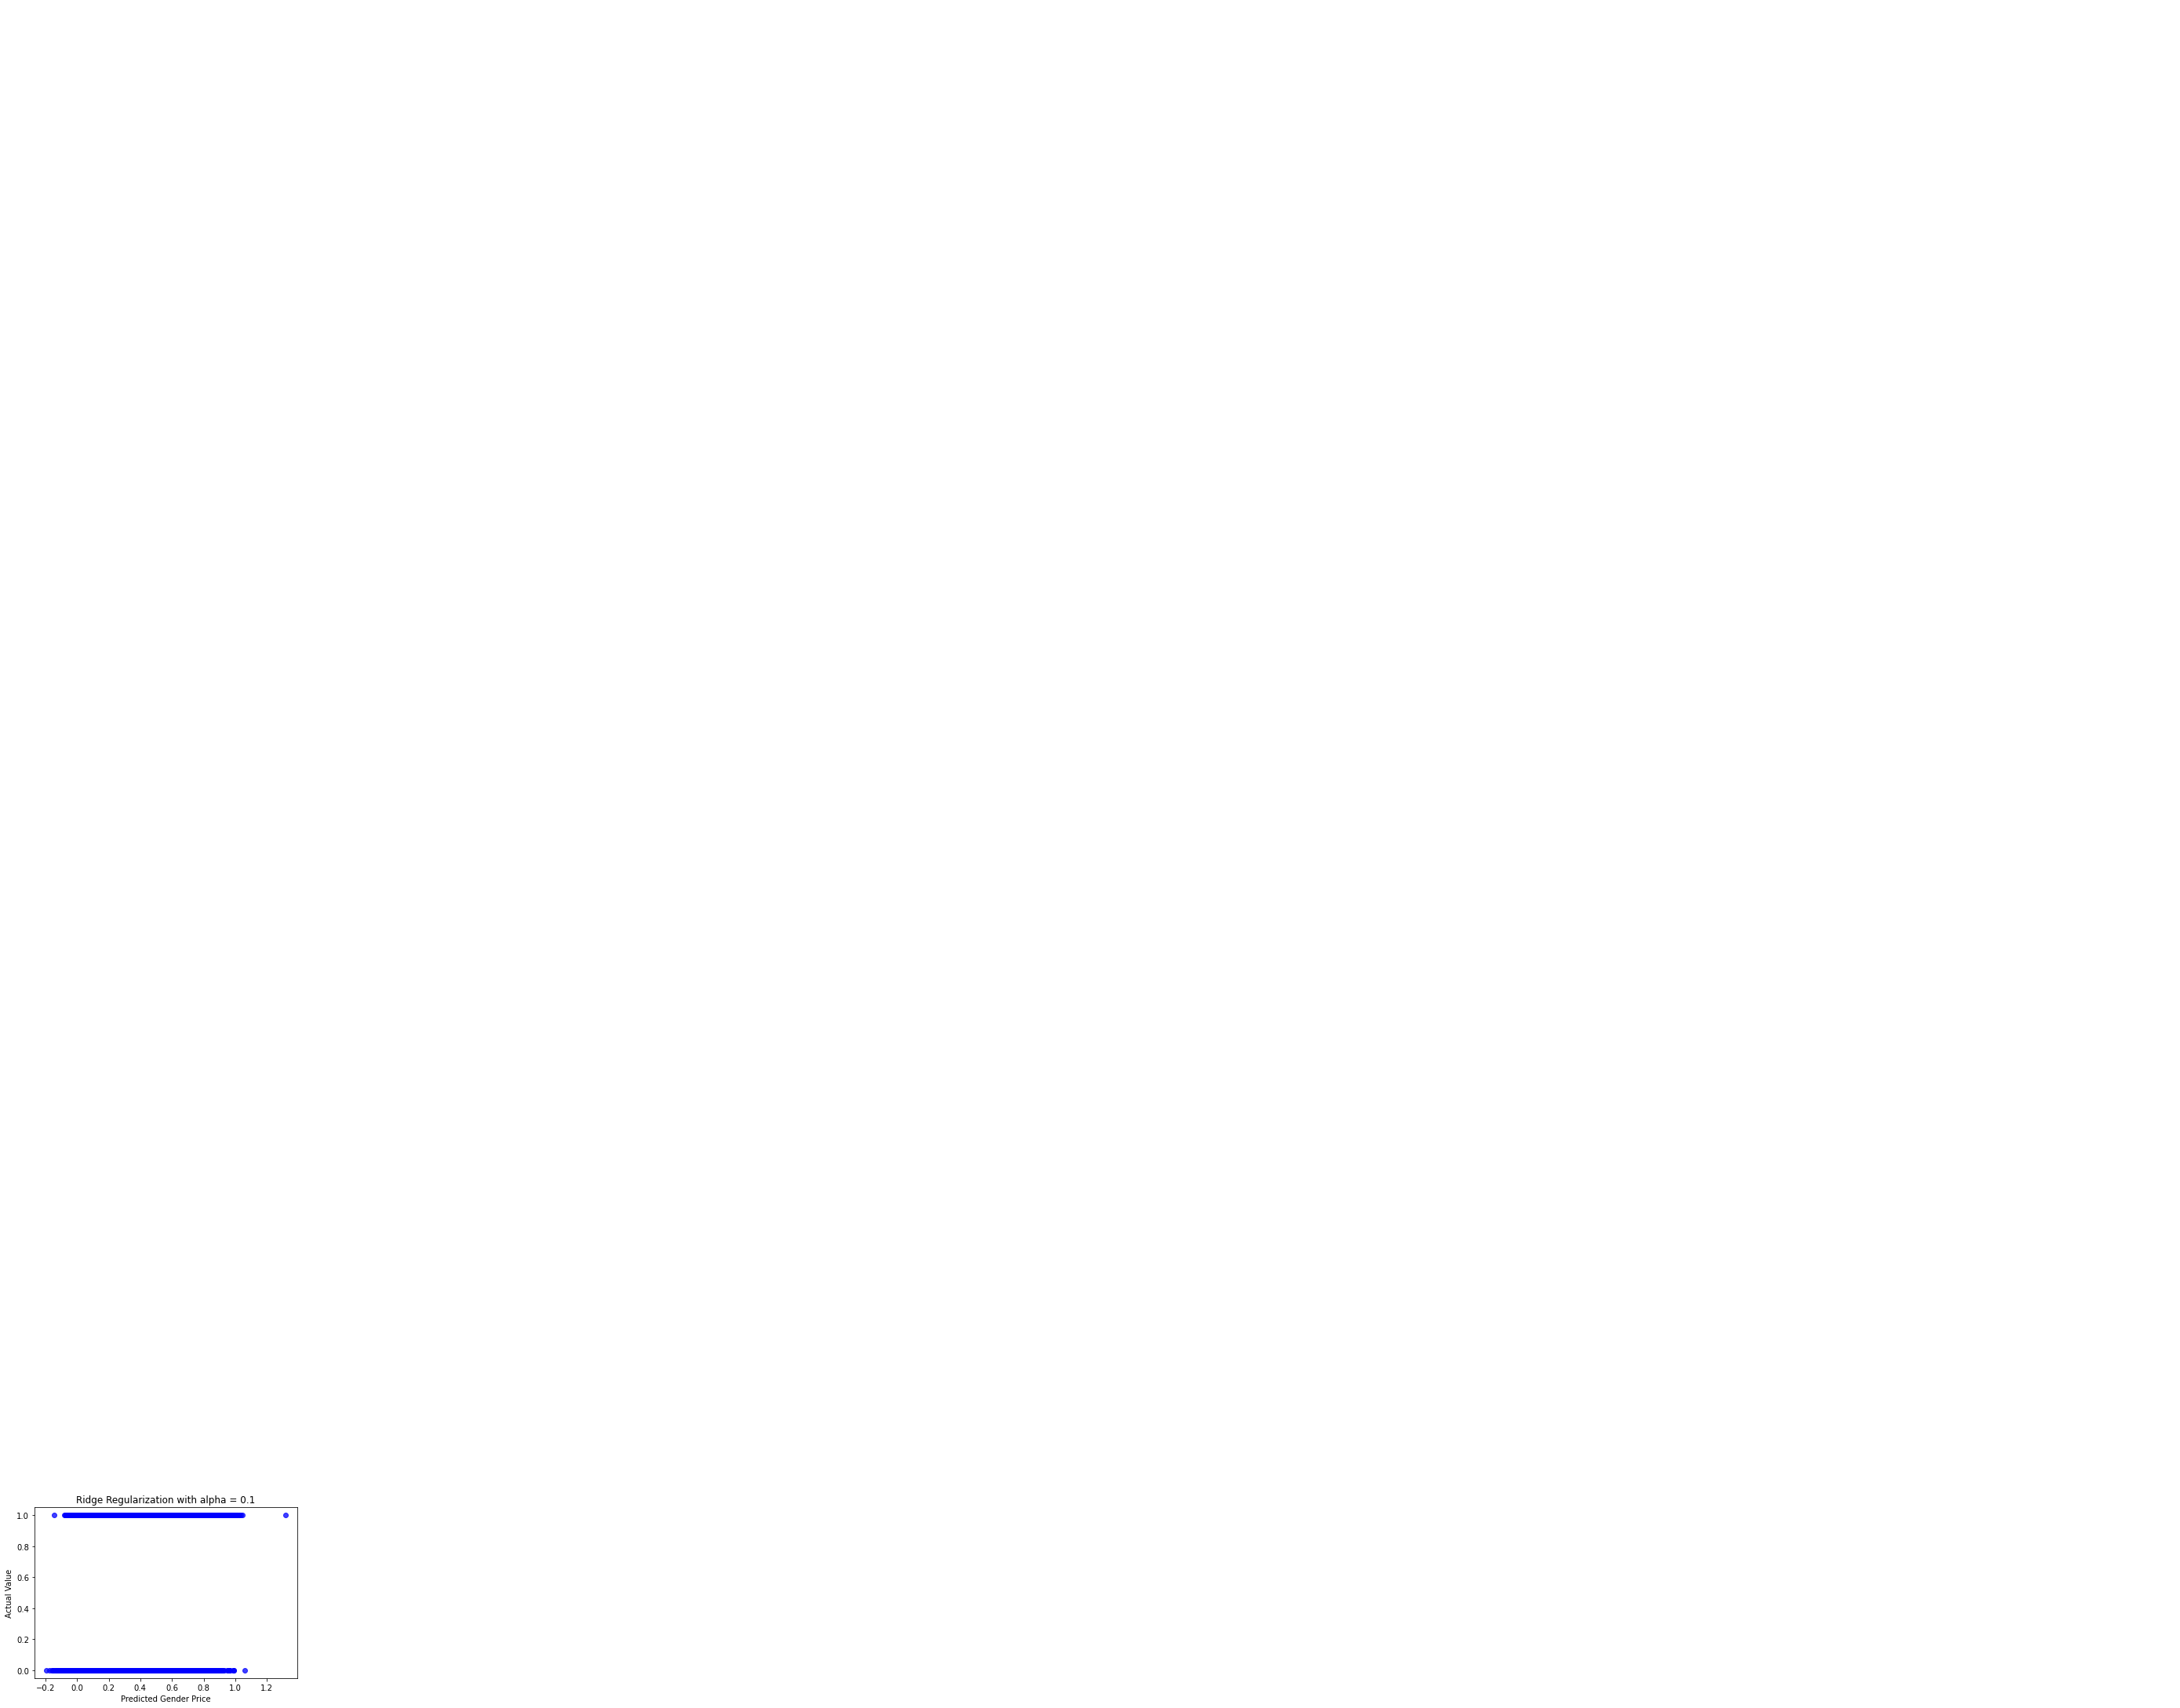

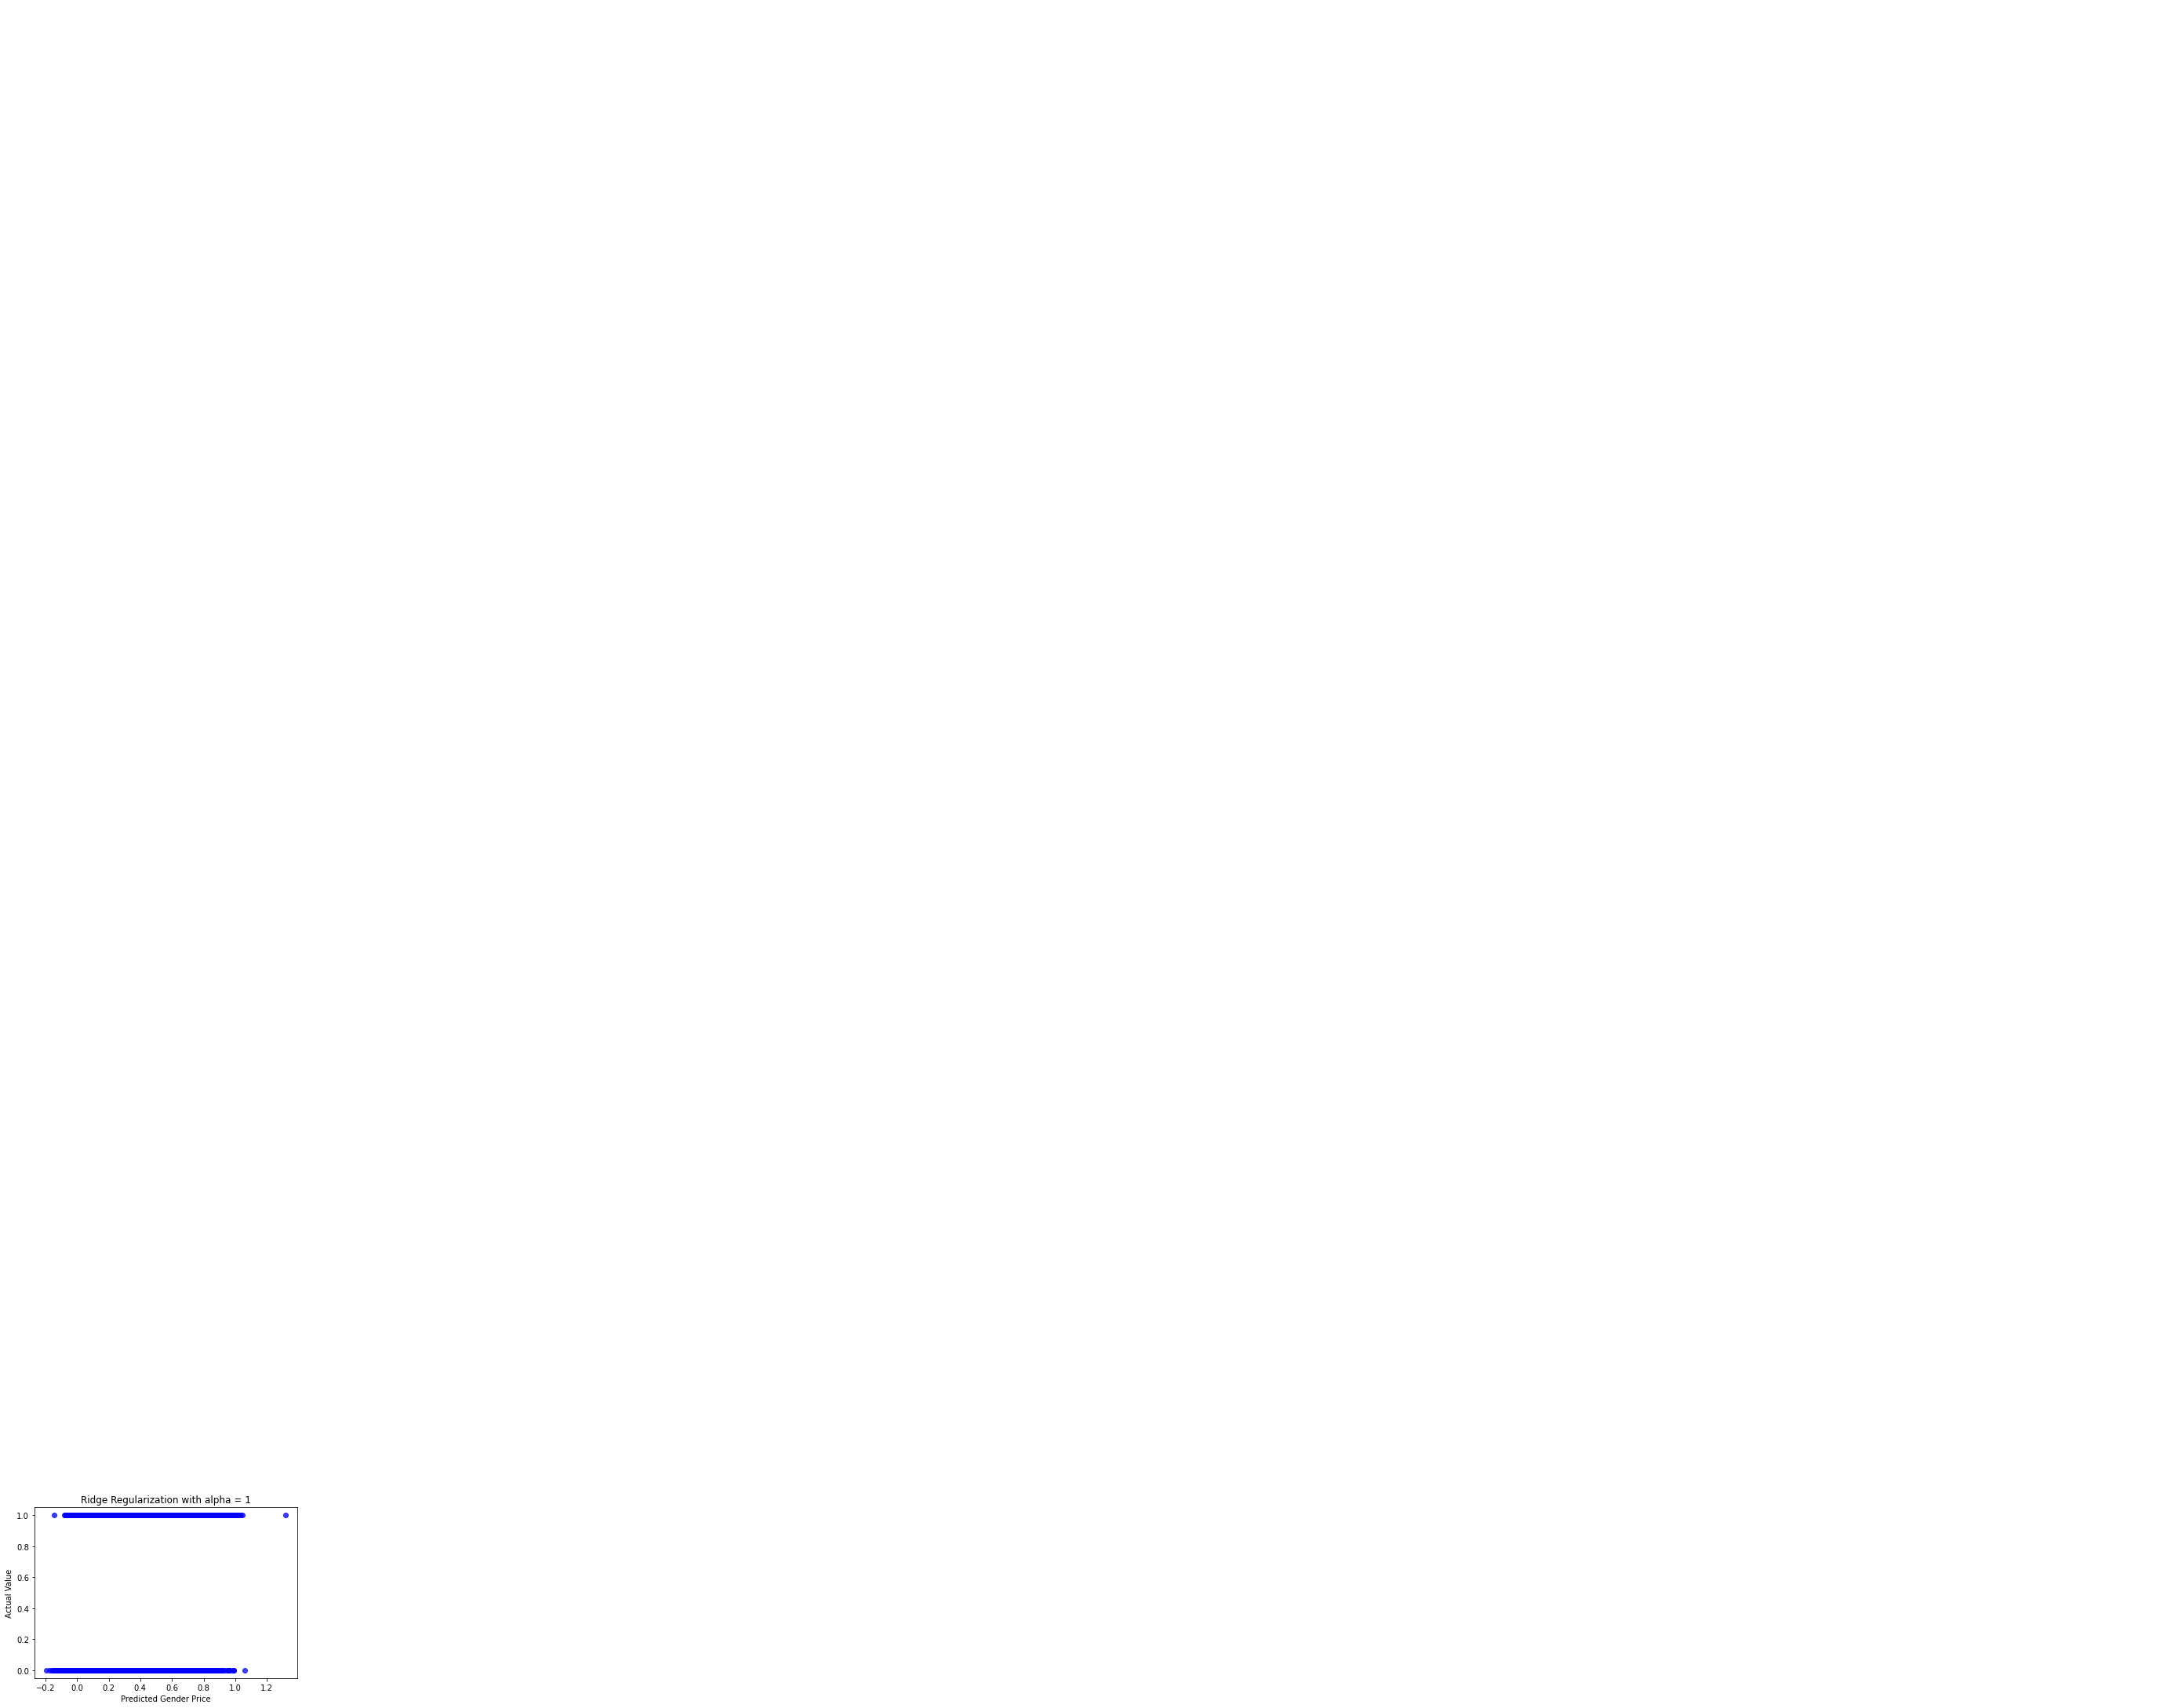

In [16]:
#Task 3.0
actual_values = y_test
from sklearn import linear_model
for i in range (-1, 1):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Gender Price')
    plt.ylabel('Actual Value')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [17]:
#Task 3.1
print("R^2 is: \n", ridge_model.score(X_test, y_test))
print('RMSE is: \n', mean_squared_error(y_test, preds_ridge))

R^2 is: 
 0.17647894318311974
RMSE is: 
 0.18587419971486044


Lasso GridSearchCV model

In [18]:
#Task 4.0
lasso = Lasso()
params = {"alpha" : [ 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

In [19]:
lasso_regressor = GridSearchCV(lasso, params, cv=5)

In [20]:
lasso_model=lasso_regressor.fit(X_train, y_train)


In [21]:
preds_lasso=lasso_model.predict(X_test)

In [22]:

print("R^2 is: \n", lasso_model.score(X_test, y_test))
print('RMSE is: \n', mean_squared_error(y_test, preds_lasso))

R^2 is: 
 0.1756157877826584
RMSE is: 
 0.18606901965050415


In [23]:
lasso_regressor.best_estimator_


Lasso(alpha=0.001)